In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import mplfinance as mpf
import seaborn as sns
sns.set()

/opt/anaconda3/envs/pyfinance/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
%matplotlib inline
# %matplotlib notebook

In [3]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2017, 1, 1)

stock = web.DataReader("LINK-USD", 'yahoo')

In [4]:
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,0.189448,0.152489,0.156494,0.189165,2718640.0,0.189165
2017-09-20,0.207892,0.155292,0.189132,0.169680,2126270.0,0.169680
2017-09-21,0.181675,0.139869,0.169826,0.150503,1423220.0,0.150503
2017-09-22,0.157440,0.126297,0.149562,0.131129,1186670.0,0.131129
2017-09-23,0.190250,0.130275,0.131110,0.170278,1025740.0,0.170278


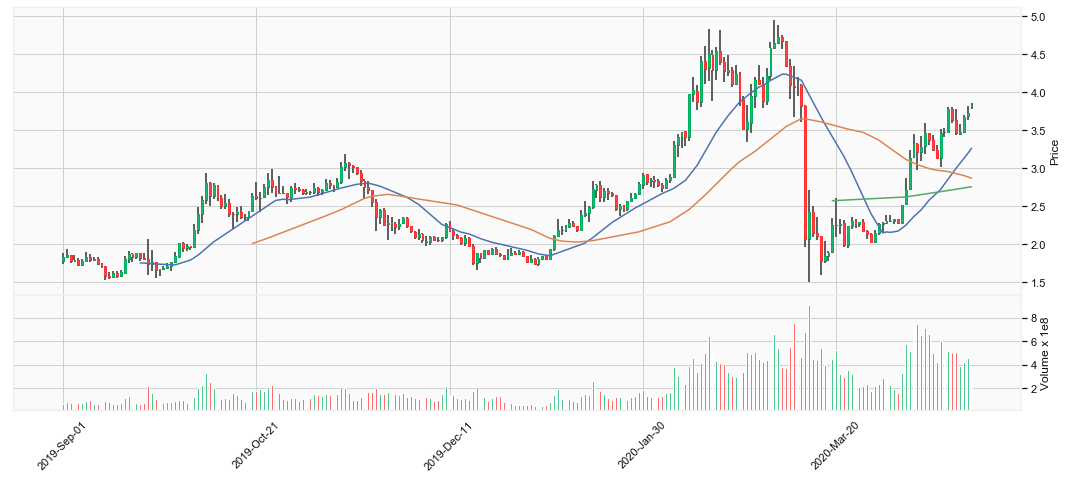

In [5]:
#ford = ford[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] # riordino le colonne

mpf.plot(
    stock.loc['2019-09':'2020'],
    type='candle',
    mav=(21,50,200),
    #title="FORD",
    volume=True,
    style='yahoo',
    figratio=(20,8)
)

## Moving Average

In [6]:
stock['MA21'] = stock['Adj Close'].rolling(window=21).mean()

In [7]:
stock['MA50'] = stock['Adj Close'].rolling(window=50).mean()

In [8]:
stock['MA200'] = stock['Adj Close'].rolling(window=200).mean()

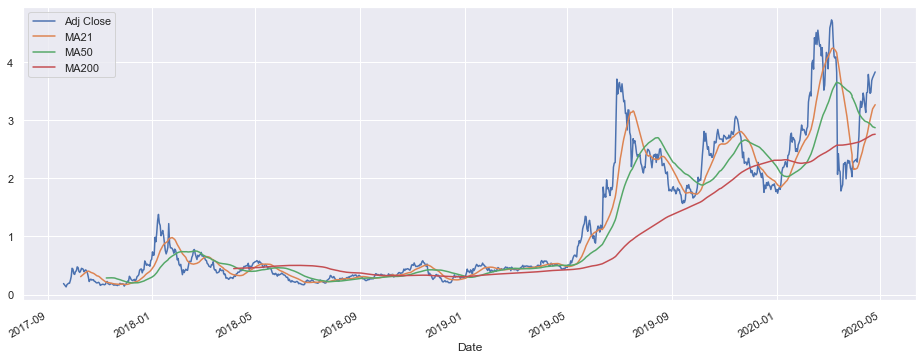

In [9]:
stock[['Adj Close','MA21','MA50','MA200']].plot(figsize=(16,6))

### Ultimi 50 giorni

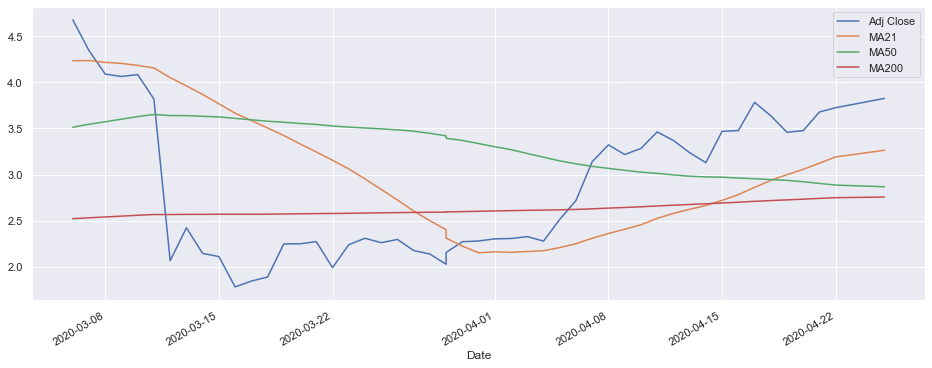

In [11]:
stock[['Adj Close','MA21','MA50','MA200']].tail(50).plot(figsize=(16,6))

## Ritorno sull'investimento

In [12]:
stock['returns'] = stock['Adj Close'].pct_change(1)

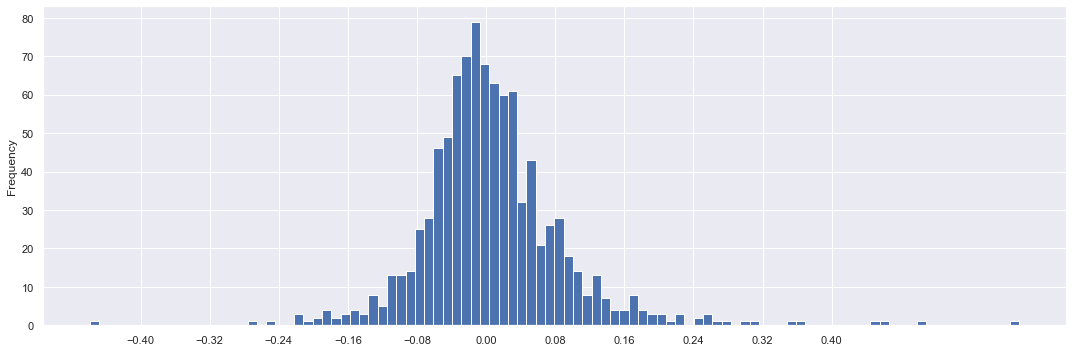

In [13]:
stock['returns'].plot(kind='hist', bins=100, figsize=(15,5))
plt.xticks(np.linspace(-0.4,0.4,11));
plt.tight_layout()

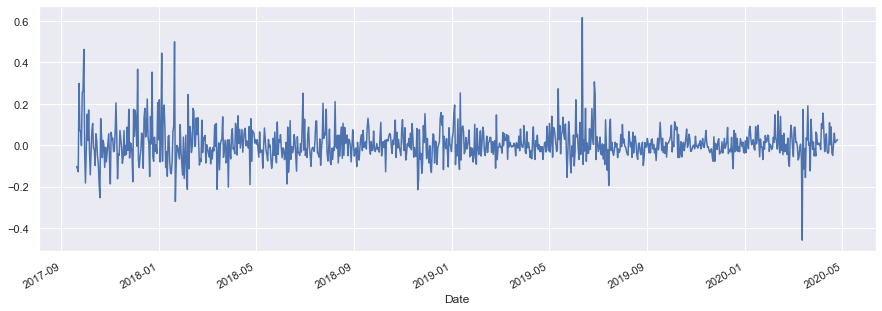

In [14]:
stock['returns'].plot(figsize=(15,5))

In [15]:
pd.DataFrame(stock['returns'].describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
returns,947.0,0.006531,0.0836,-0.45913,-0.036995,-0.001522,0.041494,0.617069


## EWMA

## Bollinger

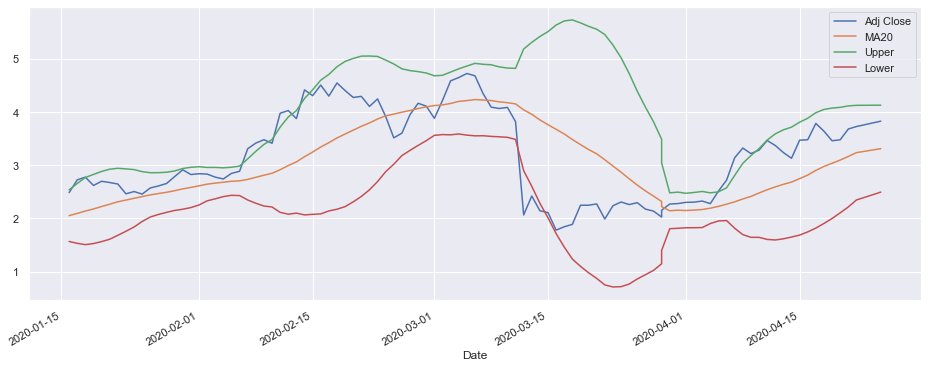

In [16]:
# Close 20 MA
stock['MA20'] = stock['Adj Close'].rolling(window=20).mean()

# Upper = 20MA + 2*std(20)
stock['Upper'] = stock['MA20'] + 2*stock['Adj Close'].rolling(window=20).std()

# Lower = 20MA - 2*std(20)
stock['Lower'] = stock['MA20'] - 2*stock['Adj Close'].rolling(window=20).std()

# Close
stock[['Adj Close','MA20','Upper','Lower']].tail(100).plot(figsize=(16,6))

## MACD

In [17]:
stock['EWMA12'] = stock['Adj Close'].ewm(span=12).mean()
stock['EWMA26'] = stock['Adj Close'].ewm(span=26).mean()

In [18]:
stock['MACD'] = stock['EWMA12'] - stock['EWMA26']

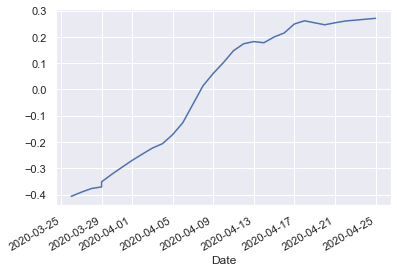

In [19]:
stock['MACD'].tail(30).plot()